In [ ]:
#importing all needed libraries

from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_line
from plotnine import *
from plotnine.data import mpg
from sklearn.metrics import silhouette_score
from sklearn import decomposition
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors


In [ ]:
from sklearn import decomposition
from sklearn import datasets

#read data into df

df = pd.read_excel("/content/dataframe_Breda.xlsx")
df1 = df.drop("neighborhood_name", 1)


<ipython-input-3-5f77c0ebd746>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


<bound method NDFrame.head of     indexx  - Laag [%] [2020]  - Midden [%] [2020]  - Hoog [%] [2020]  \
0        0               0.14                 0.41               0.46   
1        1               0.08                 0.24               0.67   
2        2               0.31                 0.40               0.28   
3        3               0.13                 0.37               0.50   
4        4               0.14                 0.35               0.51   
5        5               0.10                 0.48               0.43   
6        6               0.17                 0.33               0.51   
7        7               0.27                 0.37               0.36   
8        8               0.40                 0.41               0.19   
9        9               0.45                 0.38               0.17   
10      10               0.43                 0.41               0.16   
11      12               0.40                 0.45               0.15   
12      13               0.10                 0.24               0.66   
13      14               0.24                 0.41               0.35   
14      15               0.13                 0.32               0.55   
15      16               0.10                 0.32               0.58   
16      17               0.26                 0.40               0.33   
17      20               0.21                 0.33               0.46   
18      21               0.22                 0.40               0.37   
19      22               0.19                 0.28               0.53   
20      23               0.14                 0.27               0.59   
21      25               0.15                 0.29               0.56   
22      26               0.13                 0.31               0.57   
23      27               0.34                 0.29               0.37   
24      28               0.37                 0.35               0.28   
25      29               0.31                 0.44               0.24   
26      30               0.26                 0.35               0.38   
27      31               0.22                 0.37               0.41   
28      35               0.21                 0.35               0.44   
29      36               0.23                 0.41               0.36   
30      37               0.25                 0.45               0.31   
31      38               0.33                 0.45               0.21   
32      39               0.31                 0.41               0.28   
33      40               0.28                 0.42               0.31   
34      41               0.21                 0.47               0.32   
35      42               0.21                 0.41               0.38   
36      44               0.20                 0.42               0.38   
37      45               0.21                 0.28               0.51   
38      47               0.19                 0.33               0.48   
39      49               0.23                 0.42               0.35   
40      51               0.22                 0.35               0.42   

    Huurwoningen [%]  Koopwoningen [%]  Eigendom onbekend [%]  \
0               0.69              0.30                   0.01   
1               0.51              0.49                   0.01   
2               0.81              0.15                   0.04   
3               0.79              0.20                   0.01   
4               0.79              0.21                   0.00   
5               0.73              0.25                   0.02   
6               0.38              0.62                   0.00   
7               0.67              0.33                   0.00   
8               0.60              0.40                   0.00   
9               0.81              0.19                   0.00   
10              0.57              0.43                   0.00   
11              0.69              0.31                   0.00   
12              0.30              0.70                   0

In [ ]:
df1.head(5)

,indexx,- Laag [%] [2020],- Midden [%] [2020],- Hoog [%] [2020],Huurwoningen [%],Koopwoningen [%],Eigendom onbekend [%],Woningen met bouwjaar tot 2000 [%],Woningen met bouwjaar vanaf 2000 [%],Huurwoningen in bezit van woningcorporaties [%],...,aantal_inwoners_0_tot_15_jaar,aantal_inwoners_15_tot_25_jaar,aantal_inwoners_25_tot_45_jaar,aantal_meergezins_woningen,aantal_mannen,aantal_vrouwen,aantal_inwoners,green_score,livability_score,percentage_huurwoningen
0,0,0.14,0.41,0.46,0.69,0.30,0.01,0.83,0.17,0.34,...,8.333333,23.421053,26.666667,46.200000,36.034483,36.896552,72.758621,26.487179,2.201133,66.956522
1,1,0.08,0.24,0.67,0.51,0.49,0.01,0.56,0.44,0.21,...,11.388889,14.814815,28.529412,44.843750,43.026316,40.540541,83.026316,16.188406,2.303931,50.666667
2,2,0.31,0.40,0.28,0.81,0.15,0.04,0.91,0.09,0.57,...,10.714286,23.846154,35.789474,35.625000,45.000000,45.526316,80.000000,18.869953,2.004738,77.142857
3,3,0.13,0.37,0.50,0.79,0.20,0.01,0.84,0.16,0.46,...,7.500000,36.428571,66.086957,96.304348,71.400000,65.600000,137.200000,14.803241,1.828105,80.909091
4,4,0.14,0.35,0.51,0.79,0.21,0.00,0.52,0.48,0.42,...,15.000000,17.800000,42.800000,42.800000,43.269231,39.464286,79.821429,15.095238,2.144758,78.333333


Scalling dataframe

In [ ]:
#scaling the data
scaler = StandardScaler()
scaler.fit(df1)
scaled_data = scaler.transform(df1)

In [ ]:
scaled_data.shape

(41, 104)

PCA

In [ ]:
#pca model

pca = decomposition.PCA(n_components=2)

#fitting the model

pca.fit(scaled_data)

pcaData = pca.transform(scaled_data)
pcaData.shape

(41, 2)

1. Run pca on raw data (choose n components using the elbow method)
2. Run a clustering algorithm on the pca output
3. Merge the pca data with the labels (obtained from clustering) and the original neighbourhood names
4. Plot

In [ ]:
pcaData

array([[ 8.27170185e+00,  7.62872765e+00],
       [ 3.57610423e+00,  6.23694067e+00],
       [ 1.14061378e+01,  5.09434132e-01],
       [ 1.42591555e+01,  6.60196041e+00],
       [ 9.35093120e+00,  3.57821261e+00],
       [ 1.11822388e+01,  9.58753564e+00],
       [ 4.95806607e-01, -1.62529947e+00],
       [ 6.11316435e+00, -1.80019548e+00],
       [ 5.40552645e+00, -4.39234170e+00],
       [ 6.90224822e+00, -5.69966370e+00],
       [ 3.82151567e+00, -4.82042033e+00],
       [ 5.90409195e+00, -4.76172664e+00],
       [-3.07834206e+00, -8.01229138e+00],
       [ 4.08527007e+00,  3.10355735e-03],
       [-4.62329231e+00,  3.39784524e+00],
       [-2.93446983e+00,  1.63251645e+00],
       [-7.83041162e-01, -4.24865047e-01],
       [-4.24466121e+00,  2.73881858e-02],
       [-2.36032868e+00,  2.58217124e+00],
       [-5.87989214e+00,  4.59686302e+00],
       [-6.92870161e+00,  2.31185269e+00],
       [-4.21073560e+00,  1.69954683e+00],
       [-8.04292721e+00,  8.50604370e+00],
       [ 4.

In [ ]:
#transform array to dataframe
pca_df = pd.DataFrame(data = pcaData, columns = ['pca1', 'pca2'])
pca_df


,pca1,pca2
0,8.271702,7.628728
1,3.576104,6.236941
2,11.406138,0.509434
3,14.259155,6.601960
4,9.350931,3.578213
5,11.182239,9.587536
6,0.495807,-1.625299
7,6.113164,-1.800195
8,5.405526,-4.392342
9,6.902248,-5.699664


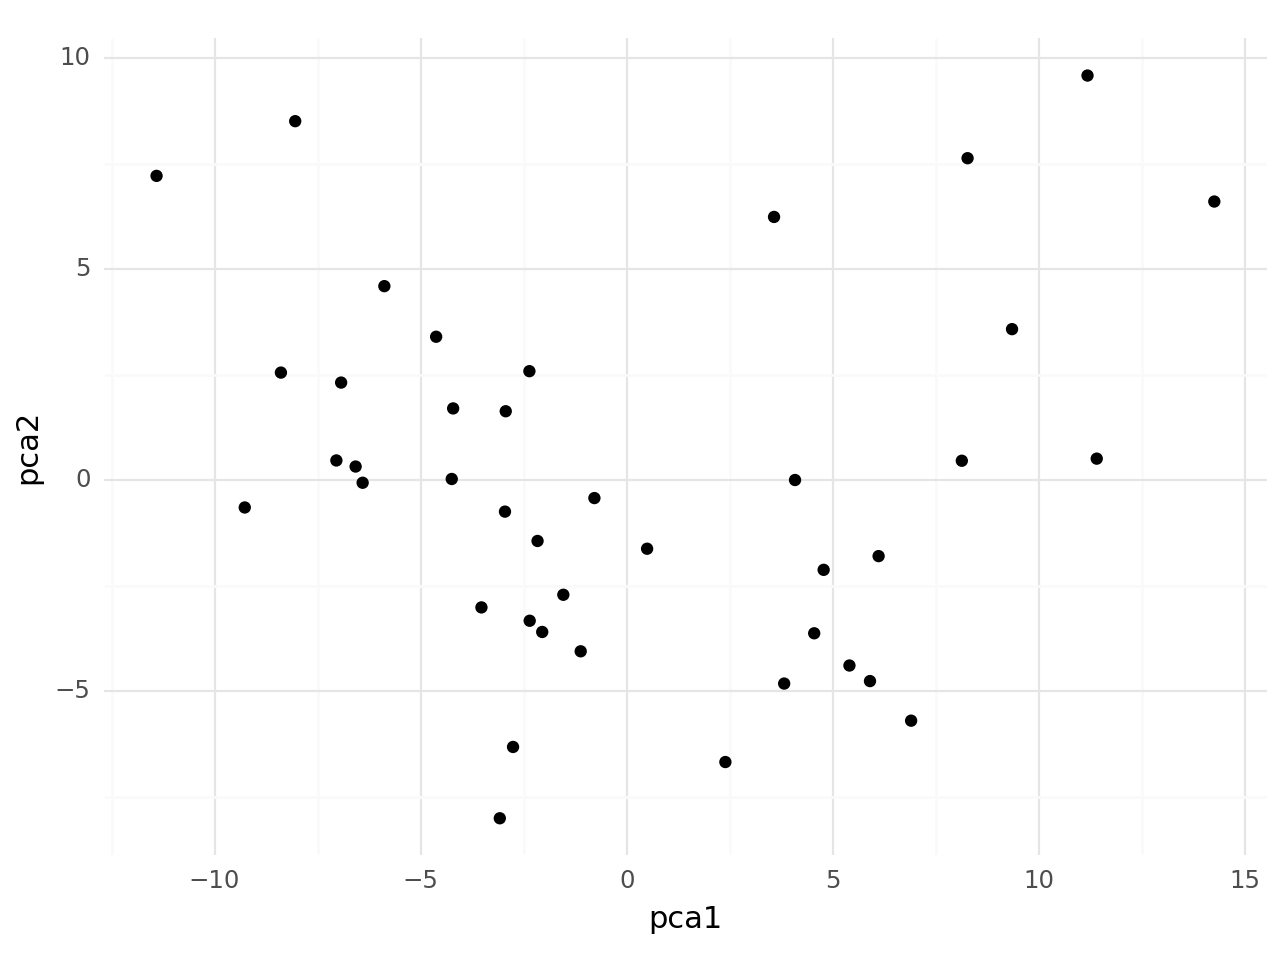

<Figure Size: (640 x 480)>

In [ ]:
#plotting simple graph
ggplot(pca_df,aes(x = "pca1" , y = "pca2" )) + geom_point() + theme_minimal()

Now before I add my DBscan model, i need to find the best eps, and to do that i have to run elbow method first

In [ ]:
#we ask for 4 nearest, because the data point it self (distance = 0) is included
from sklearn import neighbors
mins = 3
nn = NearestNeighbors(n_neighbors = mins + 1)


#here im fitting the model with pca data
nbrs = nn.fit(pca_df[["pca1","pca2"]])
distances, indices = nbrs.kneighbors(pca_df[["pca1","pca2"]])
print(distances)

#distncases our data points and 3 nearest neihbors

[[0.         3.5082979  4.19182634 4.8975206 ]
 [0.         4.8975206  6.25459631 6.35747288]
 [0.         3.27432013 3.69340972 5.77494211]
 [0.         4.28731566 5.76486915 6.07485406]
 [0.         3.34834024 3.69340972 4.19182634]
 [0.         3.5082979  4.28731566 6.28216929]
 [0.         1.75399385 2.30727624 2.66491688]
 [0.         1.37268376 2.40548683 2.68700083]
 [0.         0.62049399 1.14648095 1.64083559]
 [0.         1.36968678 1.98727624 3.13371432]
 [0.         1.39680777 1.64083559 2.0834032 ]
 [0.         0.62049399 1.36968678 1.76530224]
 [0.         1.7202646  4.41656178 4.53293112]
 [0.         2.23885281 2.7137138  3.66155419]
 [0.         1.73686118 1.74769005 2.40547884]
 [0.         1.10972172 1.2780248  2.07196481]
 [0.         1.71375631 1.75399385 2.19355465]
 [0.         1.50553849 1.67250276 2.07196481]
 [0.         1.10972172 2.05012966 2.40547884]
 [0.         1.73686118 2.51421429 3.23959921]
 [0.         1.48010605 1.84873424 2.02014846]
 [0.         

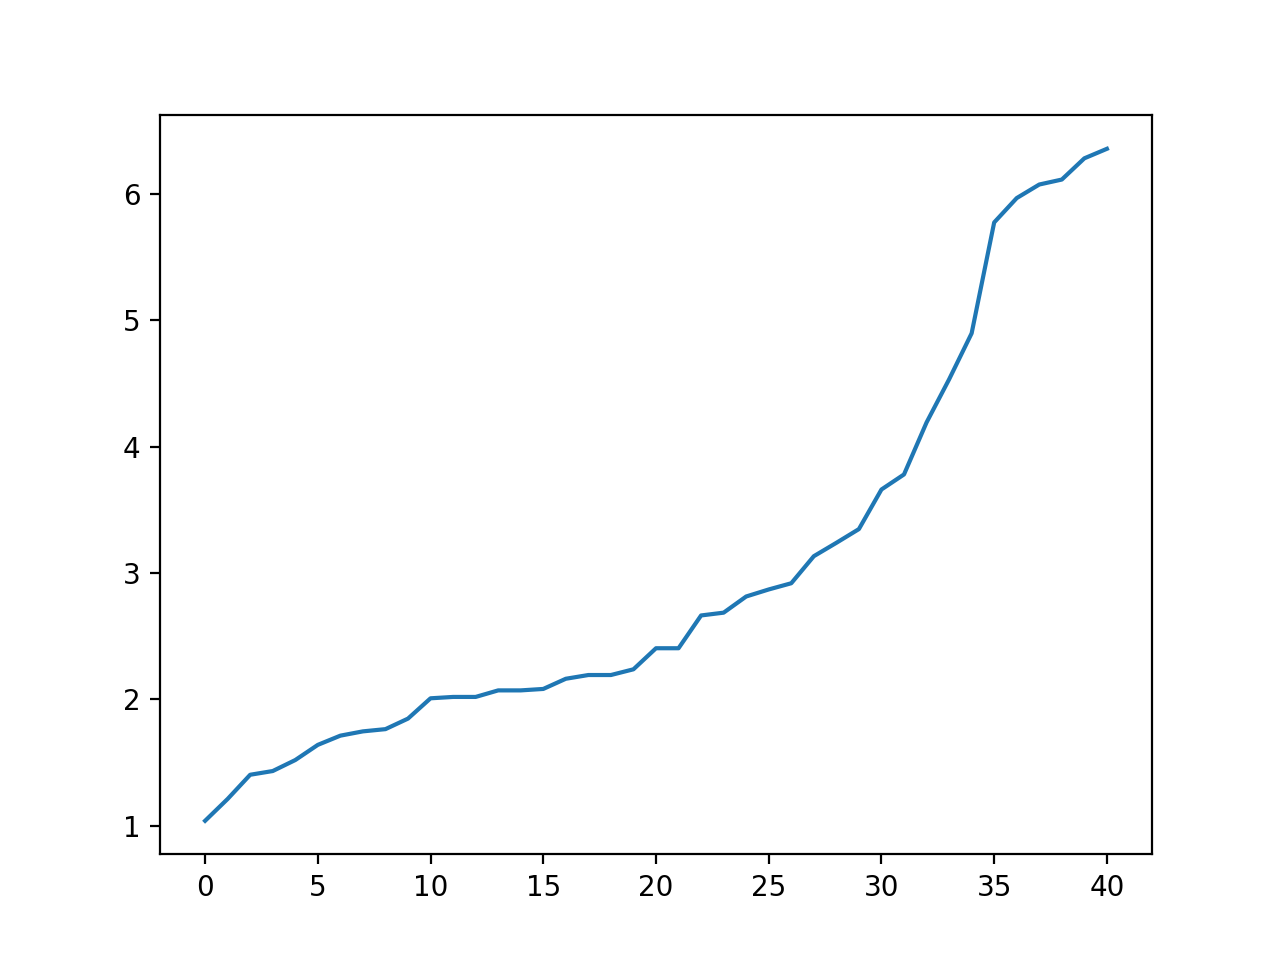

In [ ]:
#sort the distances
distances = np.sort(distances[:,mins], axis=0)
plt.plot(distances)


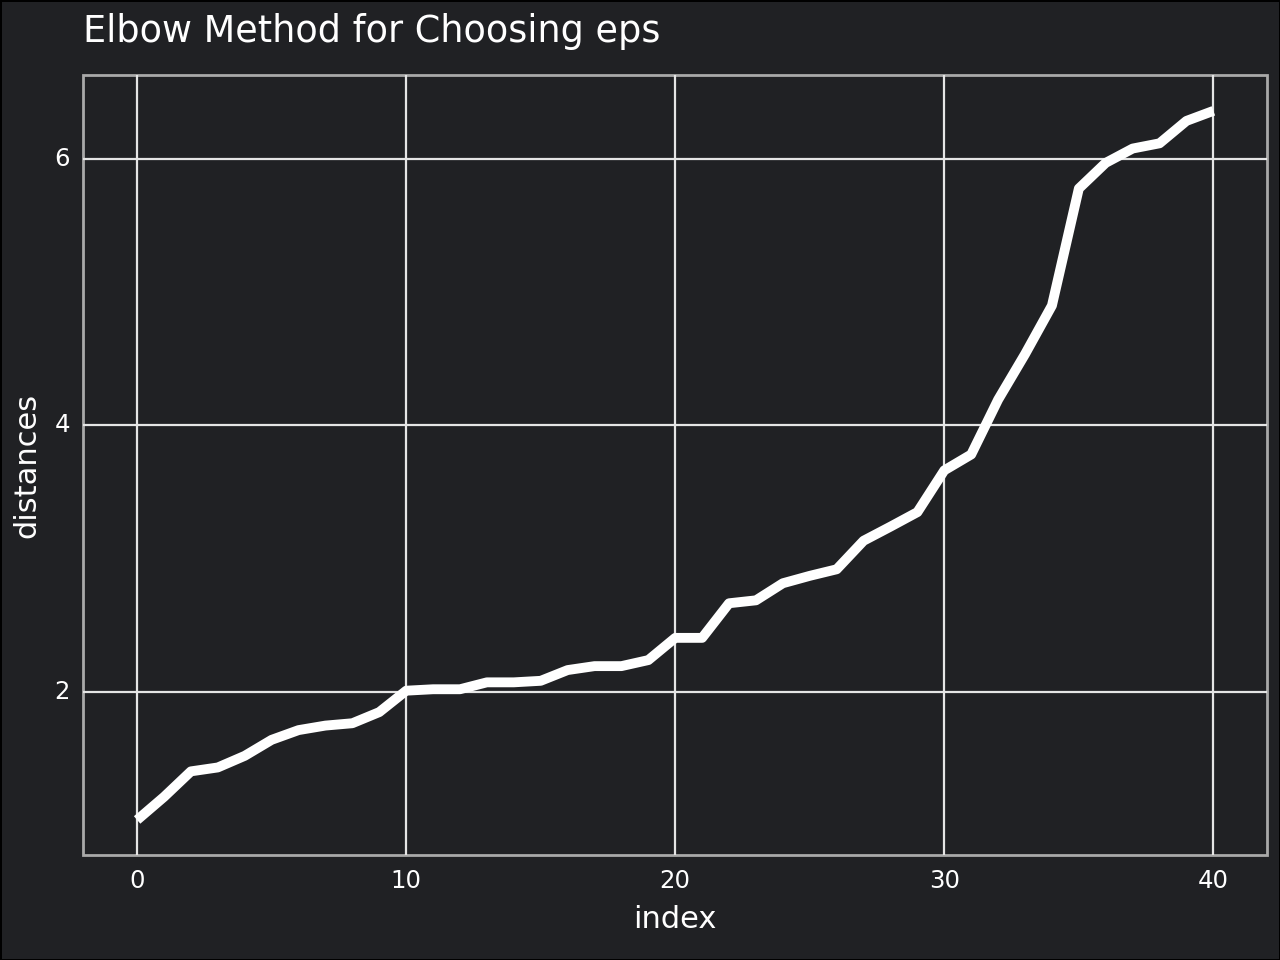

<Figure Size: (640 x 480)>

In [ ]:
#plot the distances with better plot and detect an inflection
distances_df = pd.DataFrame({"distances":distances,
                             "index":list(range(0,len(distances)))})
plt = (ggplot(distances_df,aes(x="index",y="distances"))+
 geom_line(color="white",size=2)+theme_minimal()+
 labs(title="Elbow Method for Choosing eps")+
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill="#202124ff"),
      axis_text=element_text(color="white"),
      axis_title=element_text(color="white"),
      plot_title=element_text(color="white"),
      panel_border=element_line(color="darkgray"),
      plot_background = element_rect(fill="#202124ff")
      ))
# ggsave(plot=plt,filename='elbow.png',dpi=300)
plt

After plotting eblow method, now i will try to detect an inflection point, and i would say the inflection point is arround (2.5 to 4
). and this will be my eps for my dpscan

In [ ]:
#build model
db1=DBSCAN(eps=3.2,min_samples=3).fit(pca_df)

In [ ]:
labbel=db1.labels_
print(labbel)

[-1 -1 -1 -1 -1 -1  0  1  1  1  1  1  0  1  0  0  0  0  0  0  0  0 -1  1
  1  1  0  0 -1  0  0  1  0  0  0  0  0  0  0  0  0]


In [ ]:
#adding cluster column to frame
data = pca_df
data['Clusters'] = labbel
data

,pca1,pca2,Clusters
0,8.271702,7.628728,-1
1,3.576104,6.236941,-1
2,11.406138,0.509434,-1
3,14.259155,6.601960,-1
4,9.350931,3.578213,-1
5,11.182239,9.587536,-1
6,0.495807,-1.625299,0
7,6.113164,-1.800195,1
8,5.405526,-4.392342,1
9,6.902248,-5.699664,1


In [ ]:
#adding neihborhood column
nb = df['neighborhood_name']
#print(nb)

In [ ]:
#merging all needed column in one final data frame
final_df = pd.concat([nb, data], axis=1)
final_df.sort_values(by=['Clusters'], inplace=True)
print(final_df)


   neighborhood_name       pca1      pca2  Clusters
0         Valkenberg   8.271702  7.628728        -1
1             Chassé   3.576104  6.236941        -1
2         Fellenoord  11.406138  0.509434        -1
3        Schorsmolen  14.259155  6.601960        -1
4            Station   9.350931  3.578213        -1
5               City  11.182239  9.587536        -1
28           Liesbos -11.407446  7.210021        -1
22        Ruitersbos  -8.042927  8.506044        -1
26       Princenhage  -2.952959 -0.746015         0
27        Westerpark  -3.524160 -3.015679         0
29         Gageldonk  -1.537275 -2.716217         0
30       Kievitsloop  -2.049337 -3.597700         0
35           Kroeten  -2.757027 -6.322301         0
33        Heksenwiel  -2.162757 -1.441400         0
34       Overkroeten  -2.353174 -3.331833         0
36             Bavel  -7.044037  0.466720         0
37   Nieuw Wolfslaar  -9.267136 -0.647840         0
38         Ulvenhout  -8.389758  2.548553         0
32        Mu

1- Create a list of kewetsbaare neighbourhoods. (kw_neighbourhoods = [])
2. Create a new array or list, call it IsKwetsbaar, set the value to False (IsKwetsbaar = repeat(False, 41)
3. Add IsKwetsbaar to main df
4. If i is in kw_neighbourhoods, then set IsKwetsbaar[i] = True

In [ ]:
kw_neighbourhoods = ['Geeren-noord', 'Geeren-zuid', 'Schorsmolen', 'Heuvel', 'Kesteren', 'Haagpoort', "Brabantpark" ,  'Tuinzigt', 'Doornbos-Linie', 'Fellenoord', 'Biesdonk', 'Wisselaar']

In [ ]:
isKwetsbaar = final_df['neighborhood_name'].isin(kw_neighbourhoods)
print(isKwetsbaar)
final_df["IsKwetsbaar"] = isKwetsbaar
#if we make a vraibale starts with is = it makes it boolian variable wich contains all false

0     False
1     False
2      True
3      True
4     False
5     False
28    False
22    False
26    False
27    False
29    False
30    False
35    False
33    False
34    False
36    False
37    False
38    False
32    False
21    False
20    False
19    False
6     False
12    False
39    False
14    False
15    False
40    False
17    False
18    False
16    False
25     True
24     True
31     True
23     True
11     True
10     True
9      True
8      True
7      True
13     True
Name: neighborhood_name, dtype: bool


In [ ]:
kwestbaar_wijken = final_df.loc[final_df['neighborhood_name'].isin(['Geeren-noord', 'Geeren-zuid', 'Schorsmolen', 'Heuvel', 'Kesteren', 'Haagpoort', "Brabantpark" ,  'Tuinzigt', 'Doornbos-Linie', 'Fellenoord', 'Biesdonk', 'Wisselaar'])]
print(final_df)
final_df.to_excel(r'/content/sample_data/kwestbaar_wijken_df_excel.xlsx',index = True)

   neighborhood_name       pca1      pca2  Clusters  IsKwetsbaar
0         Valkenberg   8.271702  7.628728        -1        False
1             Chassé   3.576104  6.236941        -1        False
2         Fellenoord  11.406138  0.509434        -1         True
3        Schorsmolen  14.259155  6.601960        -1         True
4            Station   9.350931  3.578213        -1        False
5               City  11.182239  9.587536        -1        False
28           Liesbos -11.407446  7.210021        -1        False
22        Ruitersbos  -8.042927  8.506044        -1        False
26       Princenhage  -2.952959 -0.746015         0        False
27        Westerpark  -3.524160 -3.015679         0        False
29         Gageldonk  -1.537275 -2.716217         0        False
30       Kievitsloop  -2.049337 -3.597700         0        False
35           Kroeten  -2.757027 -6.322301         0        False
33        Heksenwiel  -2.162757 -1.441400         0        False
34       Overkroeten  -2.

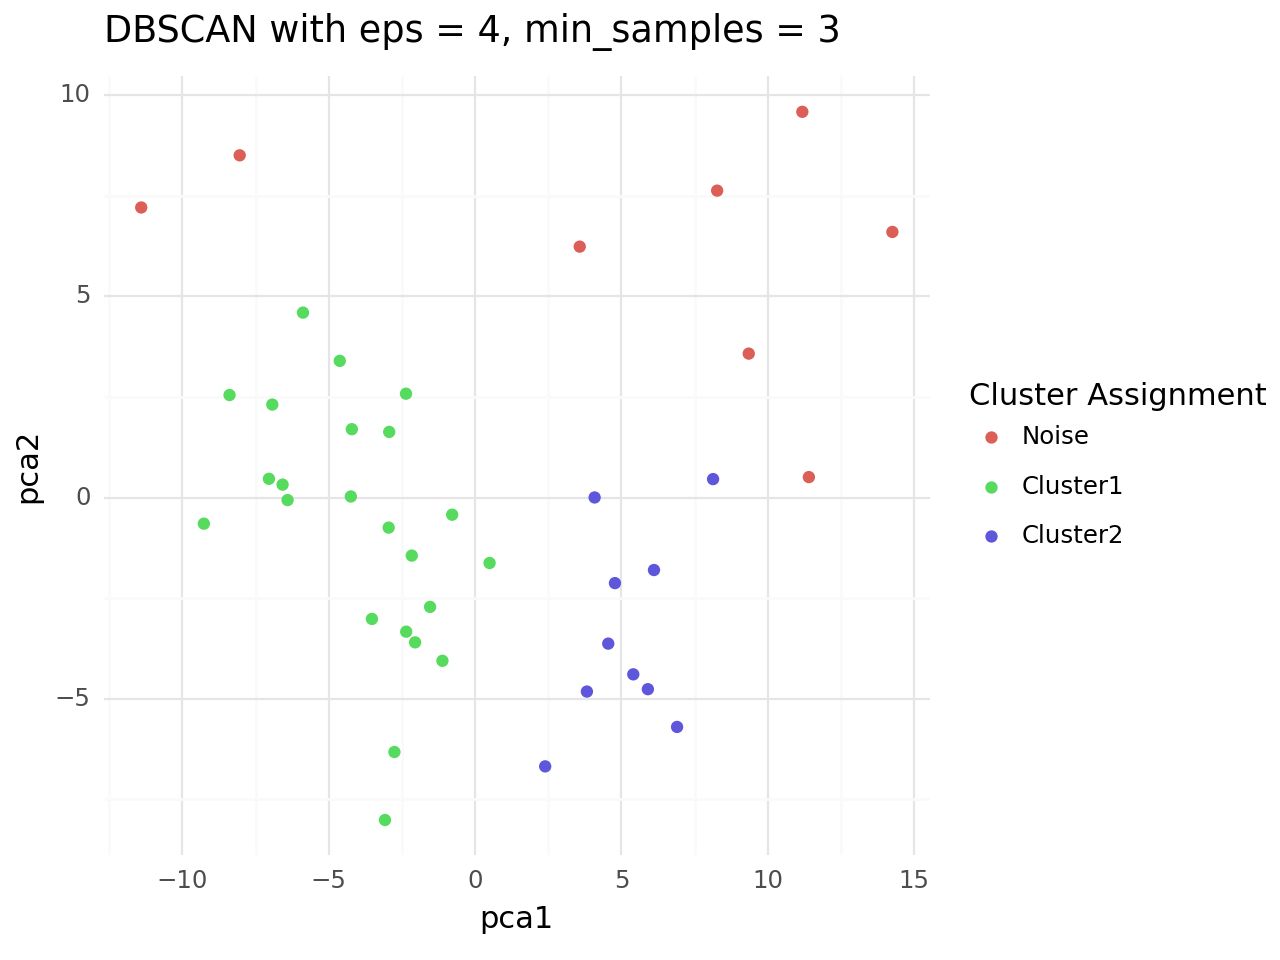

<Figure Size: (640 x 480)>

In [ ]:
#plotting clusters
labelList = ["Noise"]
labelList = labelList + ["Cluster" + str(i) for i in range(1,len(set(db1.labels_)))]

ggplot(final_df, aes(x = "pca1" , y = "pca2", color = "factor(Clusters)"))+\
geom_point()+\
scale_color_discrete(name = "Cluster Assignment", labels = labelList)+\
theme_minimal()+\
labs(title = "DBSCAN with eps = 4, min_samples = 3")

In [ ]:
final_df.to_excel(r'/content/sample_data/Dbscan_excel.xlsx',index = False)